In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib
import scipy
import seaborn as sns
from sklearn import cluster
import numpy as np
import sklearn
from  sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from numpy import genfromtxt
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from pandas.plotting import scatter_matrix
from itertools import cycle
from sklearn.decomposition import PCA
import pylab as pl
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

url= "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = [ "age","workclass", "fnlwgt","education" ,"education-num", "marital-status" ,"occupation","relationship","race","sex", "capital-gain","capital-loss","hours-per-week","native-country","salary"]
df = pd.read_csv( url ,sep=',', names = names)
data = [df]
print (df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50

In [2]:
#  plot categorical values. Each bar in the graph represents a categorical variable
# and the height of the bar is proportional to the value represented by it.

# Bar graphs are used:

# To make comparisons between variables
# To visualize any trend in the data, i.e., they show the dependence of one variable on another
# Estimate values of a variable

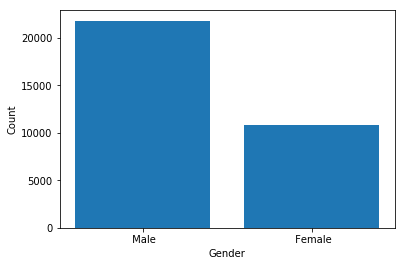

In [3]:
fig, ax = plt.subplots()  
x = df.sex.unique()  
# Counting 'Males' and 'Females' in the dataset  
y = df.sex.value_counts()  
# Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Gender')  
ax.set_ylabel('Count')  
plt.show() 

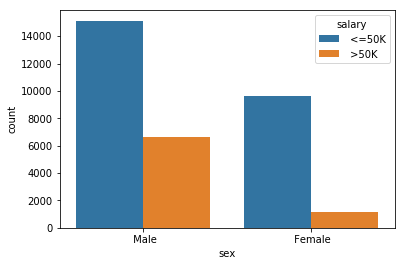

In [4]:

# ‘hue’ is used to visualize the effect of an additional variable to the current distribution.  
sns.countplot(df.sex, hue=df['salary'])  
plt.show()  

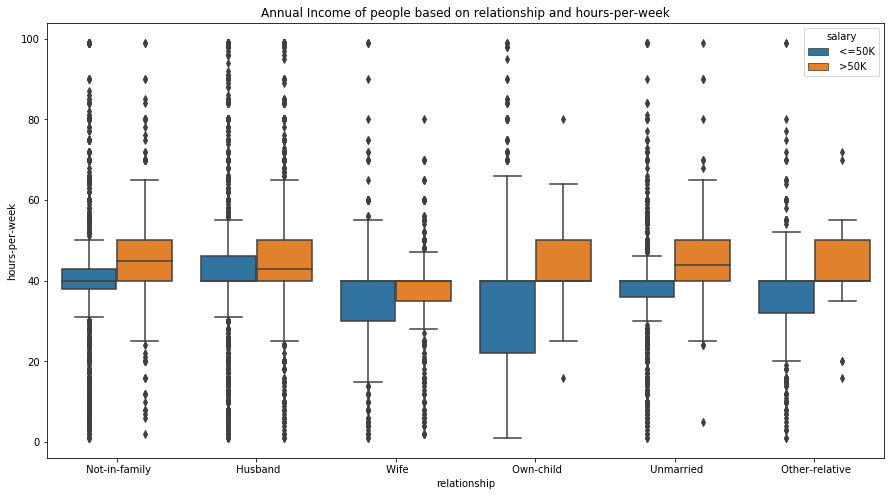

In [5]:

# Creating a box plot  
fig, ax = plt.subplots(figsize=(15, 8))  
sns.boxplot(x='relationship', y='hours-per-week', hue='salary', data=df, ax=ax)  
ax.set_title('Annual Income of people based on relationship and hours-per-week')  
plt.show() 

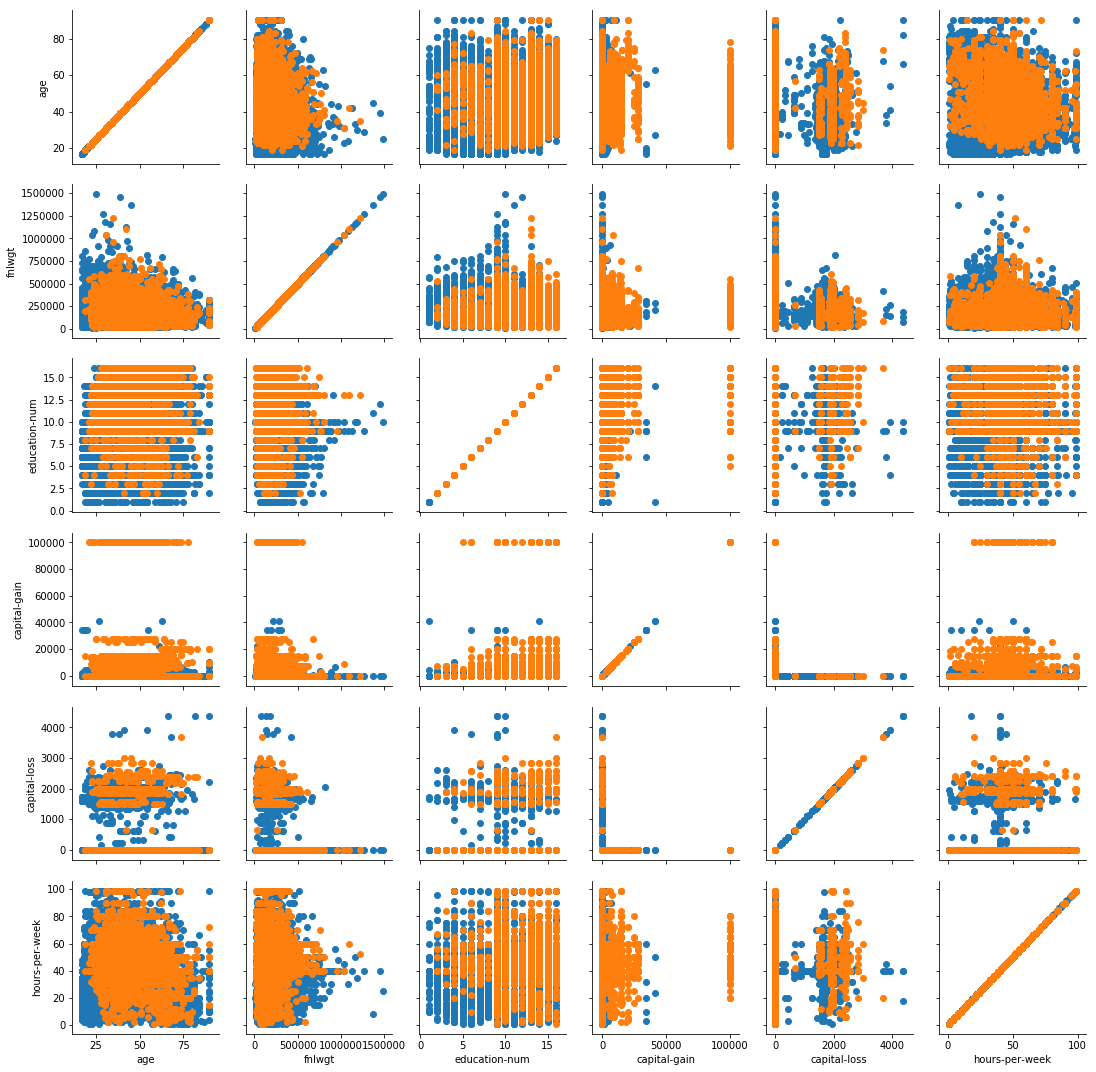

In [6]:


# Creating a scatter plots for all pairs of variables.  
g = sns.PairGrid(data=df, hue='salary')  
g.map(plt.scatter)  



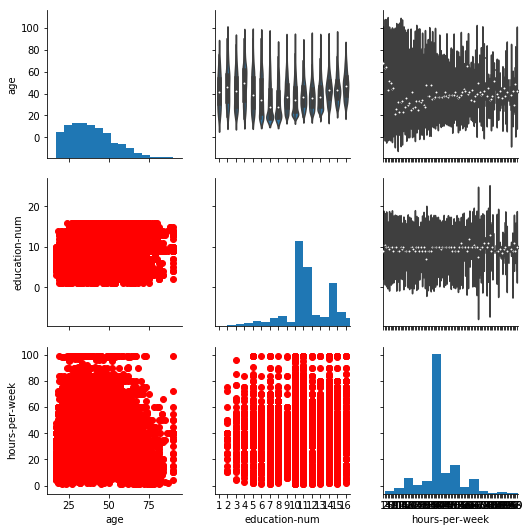

In [7]:
#Here we plot scatter plot, histogram and violin plot using Pair grid.  
g = sns.PairGrid(data=df, vars = ['age', 'education-num', 'hours-per-week'])  
# with the help of the vars parameter we can select the variables between which we want the plot to be constructed.  

g.map_lower(plt.scatter, color='red')  
g.map_diag(plt.hist, bins=15)  
g.map_upper(sns.violinplot)  

In [8]:
#Convert salary to integer

In [9]:


salary_map={' <=50K':1,' >50K':0}
df['salary']=df['salary'].map(salary_map).astype(int)
    
print (df.head(10))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3  

In [10]:
#convert sex into integer

In [11]:
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

print (df.head(10))
print (("-"*40))
print (df.info())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-cleaners   Not-in-family

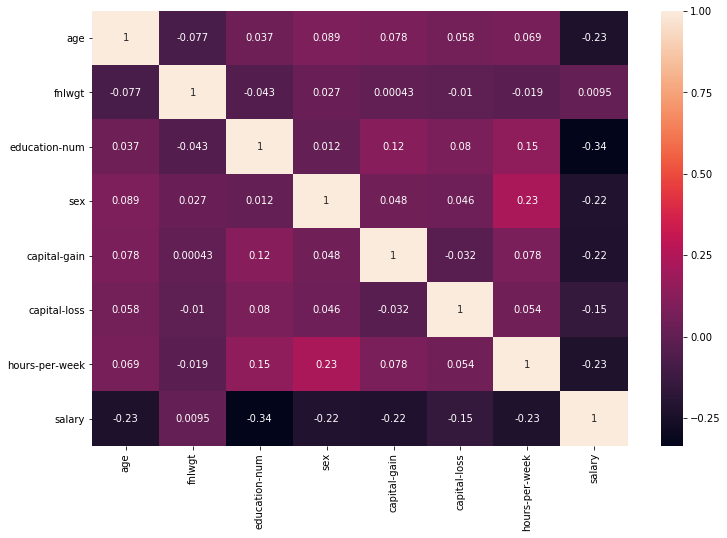

In [12]:
# #Find correlation between columns
# def plot_correlation(df, size=14):
#     corr= df.corr()
#     fig, ax =plt.subplots(figsize=(size,size))
#     ax.matshow(corr)
#     plt.xticks(range(len(corr.columns)),corr.columns)
#     plt.yticks(range(len(corr.columns)),corr.columns)
#     plt.show()
plt.figure(figsize=(12, 8))



correlations = df.corr()
sns.heatmap(correlations, 
            xticklabels = correlations.columns.values,
            yticklabels = correlations.columns.values,
            annot = True);

In [13]:
# Categorise in US and Non-US candidates

In [14]:
print (df[['native-country','salary']].groupby(['native-country']).mean())

                               salary
native-country                       
 ?                           0.749571
 Cambodia                    0.631579
 Canada                      0.677686
 China                       0.733333
 Columbia                    0.966102
 Cuba                        0.736842
 Dominican-Republic          0.971429
 Ecuador                     0.857143
 El-Salvador                 0.915094
 England                     0.666667
 France                      0.586207
 Germany                     0.678832
 Greece                      0.724138
 Guatemala                   0.953125
 Haiti                       0.909091
 Holand-Netherlands          1.000000
 Honduras                    0.923077
 Hong                        0.700000
 Hungary                     0.769231
 India                       0.600000
 Iran                        0.581395
 Ireland                     0.791667
 Italy                       0.657534
 Jamaica                     0.876543
 Japan      

In [15]:
# Drop empty value marked as '?'

In [16]:
print (df.shape)
df['native-country'] = df['native-country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)

print (df.shape)
print (df.head(10))

(32561, 15)
(30162, 15)
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-

In [17]:
for dataset in data:
    dataset.loc[dataset['native-country'] != ' United-States', 'native-country'] = 'Non-US'
    dataset.loc[dataset['native-country'] == ' United-States', 'native-country'] = 'US'

In [18]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,US,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,US,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,US,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,US,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Non-US,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,US,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Non-US,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,US,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,US,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,US,0


In [19]:
#Convert country in integer

In [20]:
df['native-country'] = df['native-country'].map({'US':1,'Non-US':0}).astype(int)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [21]:
# Data visualisation using histogram

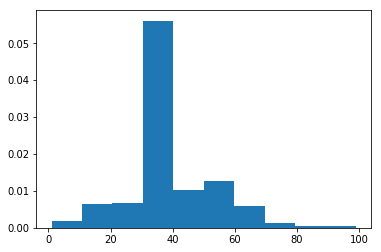

In [22]:
x= df['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

In [23]:
df[['relationship','salary']].groupby(['relationship']).mean()

,salary
relationship,
Husband,0.544331
Not-in-family,0.893477
Other-relative,0.960630
Own-child,0.985670
Unmarried,0.933686
Wife,0.506401


In [24]:
df[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Divorced,0.892738
Married-AF-spouse,0.523810
Married-civ-spouse,0.545041
Married-spouse-absent,0.916216
Never-married,0.951676
Separated,0.929712
Widowed,0.903265


In [25]:
# Categorise marital-status into single and couple

In [26]:
df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Couple,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Single,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Couple,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Single,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Couple,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [27]:
df[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Couple,0.545009
Single,0.931637


In [28]:
df[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()

salary
marital-status relationship             
Couple          Husband         0.544331
                Not-in-family   0.714286
                Other-relative  0.857143
                Own-child       0.821429
                Wife            0.506401
Single          Not-in-family   0.893802
                Other-relative  0.976623
                Own-child       0.988818
                Unmarried       0.933686

In [29]:
df[['marital-status','relationship','salary']].groupby(['relationship','marital-status']).mean()

salary
relationship    marital-status          
 Husband        Couple          0.544331
 Not-in-family  Couple          0.714286
                Single          0.893802
 Other-relative Couple          0.857143
                Single          0.976623
 Own-child      Couple          0.821429
                Single          0.988818
 Unmarried      Single          0.933686
 Wife           Couple          0.506401

In [30]:
df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})
   
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [31]:
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}

df['relationship'] = df['relationship'].map(rel_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,1,5178,0,40,1,0


In [32]:
# Analyse race

In [33]:
df[['race','salary']].groupby('race').mean()

,salary
race,
Amer-Indian-Eskimo,0.881119
Asian-Pac-Islander,0.722905
Black,0.870075
Other,0.909091
White,0.736282


In [34]:
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}


df['race']= df['race'].map(race_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0


In [35]:
df[['occupation','salary']].groupby(['occupation']).mean()

,salary
occupation,
Adm-clerical,0.866165
Armed-Forces,0.888889
Craft-repair,0.774690
Exec-managerial,0.514780
Farming-fishing,0.883721
Handlers-cleaners,0.938519
Machine-op-inspct,0.875381
Other-service,0.958904
Priv-house-serv,0.993007


In [36]:
df[['workclass','salary']].groupby(['workclass']).mean()

,salary
workclass,
Federal-gov,0.612937
Local-gov,0.705370
Private,0.781208
Self-emp-inc,0.441341
Self-emp-not-inc,0.714286
State-gov,0.731040
Without-pay,1.000000


In [37]:
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df['employment_type']=df.apply(f, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,private
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,private
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1,private
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,self_employed
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,private
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,private


In [38]:
df[['employment_type','salary']].groupby(['employment_type']).mean()

,salary
employment_type,
govt,0.692702
private,0.781208
self_employed,0.632242
without_pay,1.000000


In [39]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

df['employment_type'] = df['employment_type'].map(employment_map)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,1


In [40]:
df[['education','salary']].groupby(['education']).mean()

,salary
education,
10th,0.928049
11th,0.943702
12th,0.923077
1st-4th,0.960265
5th-6th,0.958333
7th-8th,0.937163
9th,0.945055
Assoc-acdm,0.746032
Assoc-voc,0.736802


In [41]:
# Drop columns 'workclass','education','occupation'

In [42]:
df.drop(labels=['workclass','education','occupation','fnlwgt'],axis=1,inplace=True)
df.head(10)

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,13,1,3,0,1,2174,0,40,1,1,0
1,50,13,0,2,0,1,0,0,13,1,1,2
2,38,9,1,3,0,1,0,0,40,1,1,1
3,53,7,0,2,3,1,0,0,40,1,1,1
4,28,13,0,1,3,0,0,0,40,0,1,1
5,37,14,0,1,0,0,0,0,40,1,1,1
6,49,5,1,3,3,0,0,0,16,0,1,1
7,52,9,0,2,0,1,0,0,45,1,0,2
8,31,14,1,3,0,0,14084,0,50,1,0,1
9,42,13,0,2,0,1,5178,0,40,1,0,1


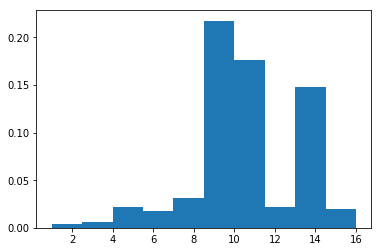

In [43]:
x= df['education-num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

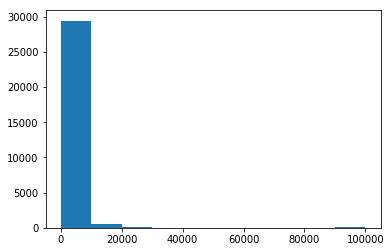

In [44]:
x=df['capital-gain']
plt.hist(x,bins=None,normed=None)
plt.show()

In [45]:
df.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
df.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0
df.head(25)

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,13,1,3,0,1,1,0,40,1,1,0
1,50,13,0,2,0,1,0,0,13,1,1,2
2,38,9,1,3,0,1,0,0,40,1,1,1
3,53,7,0,2,3,1,0,0,40,1,1,1
4,28,13,0,1,3,0,0,0,40,0,1,1
5,37,14,0,1,0,0,0,0,40,1,1,1
6,49,5,1,3,3,0,0,0,16,0,1,1
7,52,9,0,2,0,1,0,0,45,1,0,2
8,31,14,1,3,0,0,1,0,50,1,0,1
9,42,13,0,2,0,1,1,0,40,1,0,1


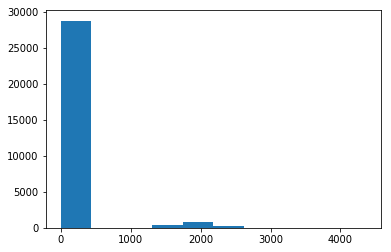

In [46]:
x=df['capital-loss']
plt.hist(x,bins=None)
plt.show()

In [47]:
df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0

df.head(10)

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,13,1,3,0,1,1,0,40,1,1,0
1,50,13,0,2,0,1,0,0,13,1,1,2
2,38,9,1,3,0,1,0,0,40,1,1,1
3,53,7,0,2,3,1,0,0,40,1,1,1
4,28,13,0,1,3,0,0,0,40,0,1,1
5,37,14,0,1,0,0,0,0,40,1,1,1
6,49,5,1,3,3,0,0,0,16,0,1,1
7,52,9,0,2,0,1,0,0,45,1,0,2
8,31,14,1,3,0,0,1,0,50,1,0,1
9,42,13,0,2,0,1,1,0,40,1,0,1


In [48]:
df['age'].count()

30162

In [49]:
df.head(10)

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,13,1,3,0,1,1,0,40,1,1,0
1,50,13,0,2,0,1,0,0,13,1,1,2
2,38,9,1,3,0,1,0,0,40,1,1,1
3,53,7,0,2,3,1,0,0,40,1,1,1
4,28,13,0,1,3,0,0,0,40,0,1,1
5,37,14,0,1,0,0,0,0,40,1,1,1
6,49,5,1,3,3,0,0,0,16,0,1,1
7,52,9,0,2,0,1,0,0,45,1,0,2
8,31,14,1,3,0,0,1,0,50,1,0,1
9,42,13,0,2,0,1,1,0,40,1,0,1


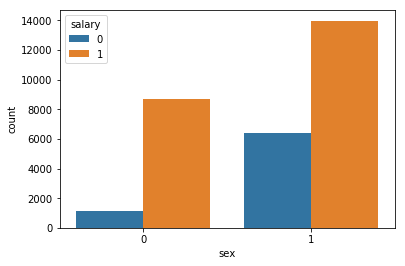

In [50]:
sns.countplot(df.sex, hue=df['salary'])  
plt.show()  

In [51]:
# K means clustering

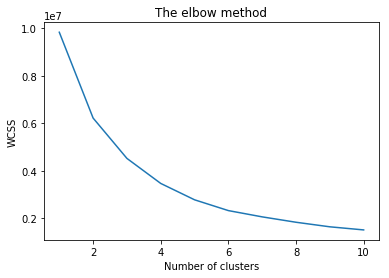

In [52]:
# print("-------------------------ALGORITHM 01: K-means clustering algorithm------------------")



#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [53]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df)

array([[ 0.04279571,  1.12891838,  0.93606249, ...,  0.31087053,
         0.57569132, -1.90911493],
       [ 0.88028814,  1.12891838, -1.06830474, ...,  0.31087053,
         0.57569132,  1.99824237],
       [-0.03333996, -0.4397382 ,  0.93606249, ...,  0.31087053,
         0.57569132,  0.04456372],
       ...,
       [ 1.48937355, -0.4397382 ,  0.93606249, ...,  0.31087053,
         0.57569132,  0.04456372],
       [-1.25151078, -0.4397382 ,  0.93606249, ...,  0.31087053,
         0.57569132,  0.04456372],
       [ 1.0325595 , -0.4397382 , -1.06830474, ...,  0.31087053,
        -1.73704199,  1.99824237]])

In [54]:
# in correlation we can see that the salary 
# effects more on relationship, employment type and race. 
# On others attribute it seems fine.

In [55]:
#K means Clustering 
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df, 3)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)

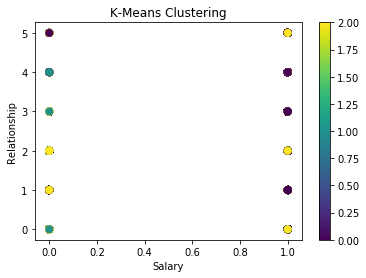

In [56]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['salary'],df['relationship'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Salary')
ax.set_ylabel('Relationship')
plt.colorbar(scatter)

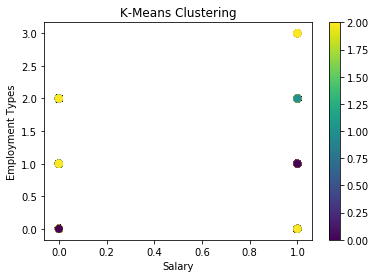

In [57]:
# Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['salary'],df['employment_type'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Salary')
ax.set_ylabel('Employment Types')
plt.colorbar(scatter)

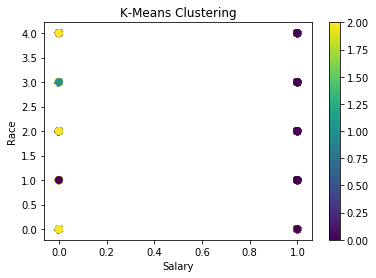

In [58]:
# Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['salary'],df['race'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Salary')
ax.set_ylabel('Race')
plt.colorbar(scatter)

In [59]:
df_clean= df.dropna()


In [60]:
df_clean.describe()

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,kmeans
count,27956.000000,27956.000000,27956.000000,27956.000000,27956.000000,27956.000000,27956.000000,27956.000000,27956.000000,27956.000000,27956.000000,27956.000000,27956.000000
mean,38.433038,10.117220,0.534197,2.382995,0.379346,0.675097,0.084275,0.046824,40.912613,0.911754,0.752039,0.978252,0.886393
std,13.147885,2.548748,0.498838,1.201416,0.973188,0.468347,0.277805,0.211265,11.961474,0.283657,0.431837,0.512717,0.897963
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000,0.000000
50%,37.000000,10.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000,1.000000
75%,47.000000,13.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,1.000000,1.000000,1.000000,2.000000
max,90.000000,16.000000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,3.000000,2.000000


In [61]:
from sklearn import preprocessing
#standarize clustering varaibles to have mean=0 and std=1
cluster=df_clean.copy()
cluster['age']=preprocessing.scale(cluster['age'].astype('float64'))
cluster['education-num']=preprocessing.scale(cluster['education-num'].astype('float64'))
cluster['marital-status']=preprocessing.scale(cluster['marital-status'].astype('float64'))
cluster['relationship']=preprocessing.scale(cluster['relationship'].astype('float64'))
cluster['race']=preprocessing.scale(cluster['race'].astype('float64'))
cluster['sex']=preprocessing.scale(cluster['sex'].astype('float64'))
cluster['capital-gain']=preprocessing.scale(cluster['capital-gain'].astype('float64'))
cluster['capital-loss']=preprocessing.scale(cluster['capital-loss'].astype('float64'))
cluster['hours-per-week']=preprocessing.scale(cluster['hours-per-week'].astype('float64'))
cluster['native-country']=preprocessing.scale(cluster['native-country'].astype('float64'))
cluster['salary']=preprocessing.scale(cluster['salary'].astype('float64'))
cluster['employment_type']=preprocessing.scale(cluster['employment_type'].astype('float64'))


In [62]:
cluster.describe()

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,kmeans
count,2.795600e+04,2.795600e+04,2.795600e+04,2.795600e+04,2.795600e+04,2.795600e+04,2.795600e+04,2.795600e+04,2.795600e+04,2.795600e+04,2.795600e+04,2.795600e+04,27956.000000
mean,1.301323e-16,-2.007901e-16,-2.312898e-17,1.561842e-16,-5.769538e-17,7.574107e-17,2.490814e-17,4.892670e-18,2.540376e-16,7.319942e-17,4.136530e-17,2.795811e-17,0.886393
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,0.897963
min,-1.630180e+00,-3.577201e+00,-1.070901e+00,-1.983523e+00,-3.898044e-01,-1.441471e+00,-3.033665e-01,-2.216387e-01,-3.336823e+00,-3.214340e+00,-1.741520e+00,-1.908009e+00,0.000000
25%,-7.935287e-01,-4.383486e-01,-1.070901e+00,-3.187917e-01,-3.898044e-01,-1.441471e+00,-3.033665e-01,-2.216387e-01,-7.629737e-02,3.111058e-01,5.742111e-01,4.241881e-02,0.000000
50%,-1.089957e-01,-4.599201e-02,9.337933e-01,-3.187917e-01,-3.898044e-01,6.937359e-01,-3.033665e-01,-2.216387e-01,-7.629737e-02,3.111058e-01,5.742111e-01,4.241881e-02,1.000000
75%,6.515965e-01,1.131078e+00,9.337933e-01,5.135741e-01,-3.898044e-01,6.937359e-01,-3.033665e-01,-2.216387e-01,3.417188e-01,3.111058e-01,5.742111e-01,4.241881e-02,2.000000
max,3.922143e+00,2.308147e+00,9.337933e-01,2.178306e+00,3.720472e+00,6.937359e-01,3.296343e+00,4.511847e+00,4.856293e+00,3.111058e-01,5.742111e-01,3.943275e+00,2.000000


In [63]:
#split the data into train set and test  data set

clus_train, clus_test=train_test_split(cluster,test_size=.3,random_state=123)

Text(0.5,1,'Selecting K with elbow method')

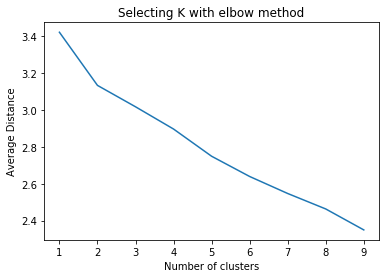

In [64]:
from scipy.spatial.distance import cdist
clusters_=range(1,10)
meandist=[]
for k in clusters_:
    kmodel=KMeans(n_clusters=k)
    kmodel.fit(clus_train)
    clusassign=kmodel.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train,kmodel.cluster_centers_,'euclidean'),axis=1))/clus_train.shape[0])
plt.plot(clusters_,meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average Distance')
plt.title('Selecting K with elbow method')

In [65]:
# centers = [[1, 1], [-1, -1], [1, -1]]
# clus_train, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,random_state=0)
model2=KMeans(n_clusters=3)
model2.fit(clus_train)
clussassign=model2.predict(clus_train)

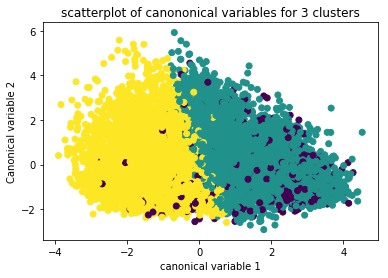

In [66]:
from sklearn.decomposition import PCA
pca_2=PCA(2)
plot_columns=pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=model2.labels_)
plt.xlabel('canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('scatterplot of canononical variables for 3 clusters')
plt.show()

In [67]:
#create a unique identifier variable from the index
#for the cluster training data to merge with the
#cluster assigment variabale

clus_train.reset_index(level=0,inplace=True)
#create a list that has new index variable
cluslist=list(clus_train['index'])
#create a list of cluster assignment
labels=list(model2.labels_)
#combine the index variable list with cluster assignment list
newlist=dict(zip(cluslist,labels))
newlist


{20623: 2,
 18548: 2,
 4620: 2,
 8152: 1,
 30012: 1,
 18140: 1,
 8593: 2,
 10407: 2,
 22923: 2,
 29270: 2,
 21107: 0,
 11101: 1,
 14847: 1,
 12664: 2,
 13538: 2,
 22736: 2,
 12445: 1,
 9553: 1,
 16617: 1,
 26179: 2,
 2500: 2,
 3761: 2,
 17671: 1,
 19146: 1,
 23616: 2,
 6490: 1,
 15465: 2,
 26748: 1,
 14206: 2,
 2875: 2,
 2306: 1,
 4324: 2,
 19977: 1,
 9410: 2,
 15645: 2,
 7430: 2,
 9782: 1,
 21643: 1,
 9835: 2,
 11514: 1,
 25220: 2,
 9376: 1,
 11721: 2,
 27293: 1,
 28226: 1,
 16921: 1,
 14830: 1,
 14643: 2,
 10307: 1,
 16825: 2,
 6274: 1,
 19197: 2,
 6411: 1,
 3236: 2,
 6167: 2,
 28441: 2,
 23652: 2,
 8881: 2,
 6526: 1,
 13352: 1,
 9824: 1,
 10808: 1,
 3915: 1,
 23291: 2,
 839: 2,
 19265: 1,
 15178: 2,
 28423: 0,
 17290: 2,
 622: 2,
 22567: 2,
 24009: 2,
 10157: 2,
 9204: 1,
 29080: 2,
 10381: 1,
 19684: 2,
 6194: 2,
 9609: 2,
 13016: 2,
 29420: 1,
 28088: 1,
 1622: 2,
 20173: 2,
 17417: 1,
 4615: 2,
 15251: 1,
 24391: 2,
 23612: 2,
 10812: 2,
 10689: 1,
 14148: 0,
 11759: 2,
 1439: 1,

In [68]:
from pandas import Series,DataFrame
newclus=DataFrame.from_dict(newlist,orient='index')
newclus

,0
20623,2
18548,2
4620,2
8152,1
30012,1
18140,1
8593,2
10407,2
22923,2
29270,2


In [69]:
newclus.columns=['cluster']
newclus.reset_index(level=0,inplace=True)
merged_train=pd.merge(clus_train,newclus,on='index')
merged_train.head(n=100)

,index,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,kmeans,cluster
0,20623,-1.173825,-0.438349,0.933793,0.513574,-0.389804,0.693736,-0.303367,-0.221639,-0.076297,0.311106,0.574211,0.042419,0.0,2
1,18548,-1.097766,-0.438349,0.933793,2.178306,2.692903,-1.441471,-0.303367,-0.221639,-0.912330,0.311106,0.574211,0.042419,0.0,2
2,4620,0.119182,1.523434,0.933793,0.513574,-0.389804,0.693736,-0.303367,-0.221639,-0.076297,0.311106,0.574211,0.042419,0.0,2
3,8152,0.727656,1.131078,-1.070901,-0.318792,1.665334,0.693736,-0.303367,-0.221639,-0.076297,-3.214340,-1.741520,0.042419,1.0,1
4,30012,-0.261114,1.131078,-1.070901,-0.318792,-0.389804,0.693736,-0.303367,-0.221639,-0.076297,0.311106,-1.741520,0.042419,2.0,1
5,18140,-0.108996,-0.438349,-1.070901,-0.318792,-0.389804,0.693736,-0.303367,-0.221639,1.595767,0.311106,-1.741520,0.042419,2.0,1
6,8593,0.119182,-0.438349,0.933793,1.345940,-0.389804,0.693736,-0.303367,-0.221639,-0.076297,0.311106,0.574211,-1.908009,0.0,2
7,10407,-1.249884,-0.438349,0.933793,1.345940,-0.389804,-1.441471,-0.303367,-0.221639,-0.494314,0.311106,0.574211,0.042419,0.0,2
8,22923,1.944603,-0.045992,0.933793,0.513574,-0.389804,-1.441471,-0.303367,-0.221639,-0.494314,0.311106,0.574211,0.042419,0.0,2
9,29270,0.651596,-2.792488,0.933793,-1.983523,-0.389804,-1.441471,-0.303367,-0.221639,-0.076297,-3.214340,0.574211,0.042419,2.0,2


In [70]:
clustergrp=merged_train.groupby('cluster').mean()
print('Clustering Variable means by cluster\n')
print(clustergrp)

Clustering Variable means by cluster

                index       age  education-num  marital-status  relationship  \
cluster                                                                        
0        14559.150655  0.236177       0.348935       -0.342120     -0.120696   
1        15101.558176  0.359830       0.113569       -0.907894     -0.380548   
2        15044.686329 -0.364093      -0.149086        0.876119      0.368774   

             race       sex  capital-gain  capital-loss  hours-per-week  \
cluster                                                                   
0       -0.089162  0.190237     -0.303367      4.511847        0.236667   
1       -0.152972  0.498741      0.239593     -0.221639        0.297090   
2        0.147322 -0.495731     -0.191609     -0.221639       -0.295735   

         native-country    salary  employment_type    kmeans  
cluster                                                       
0              0.041694 -0.603879         0.023255  0.92794

In [99]:
import pandas as pd
import time as time
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from sompy.sompy import SOMFactory
from sompy.visualization.mapview import View2D
from sompy.visualization.hitmap import HitMapView
from sompy.visualization.umatrix import UMatrixView

if __name__ == '__main__':
    msz0 = 100
    msz1 = 100
    d = clus_train.as_matrix()
    sm = SOMFactory.build(d, mapsize = [msz0, msz1], initialization='pca')
    sm.component_names = names
    sm.train(n_job = 1, shared_memory = 'no',verbose='info')

  

c:\python 3.6.6\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


ComponentNamesError: Component names should have the same size as the data dimension/features

c:\python 3.6.6\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


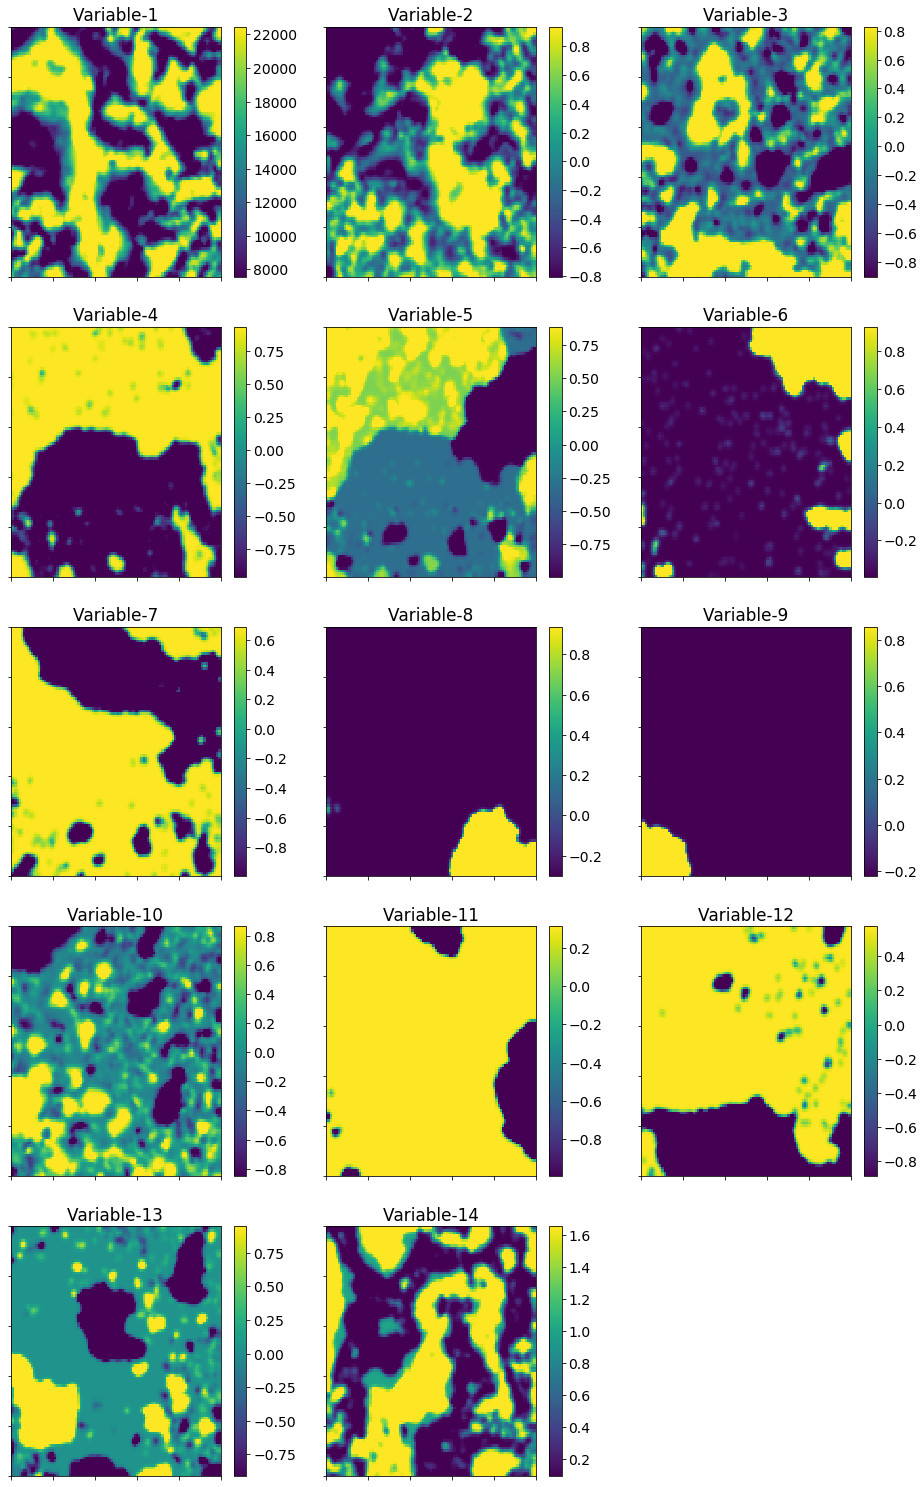

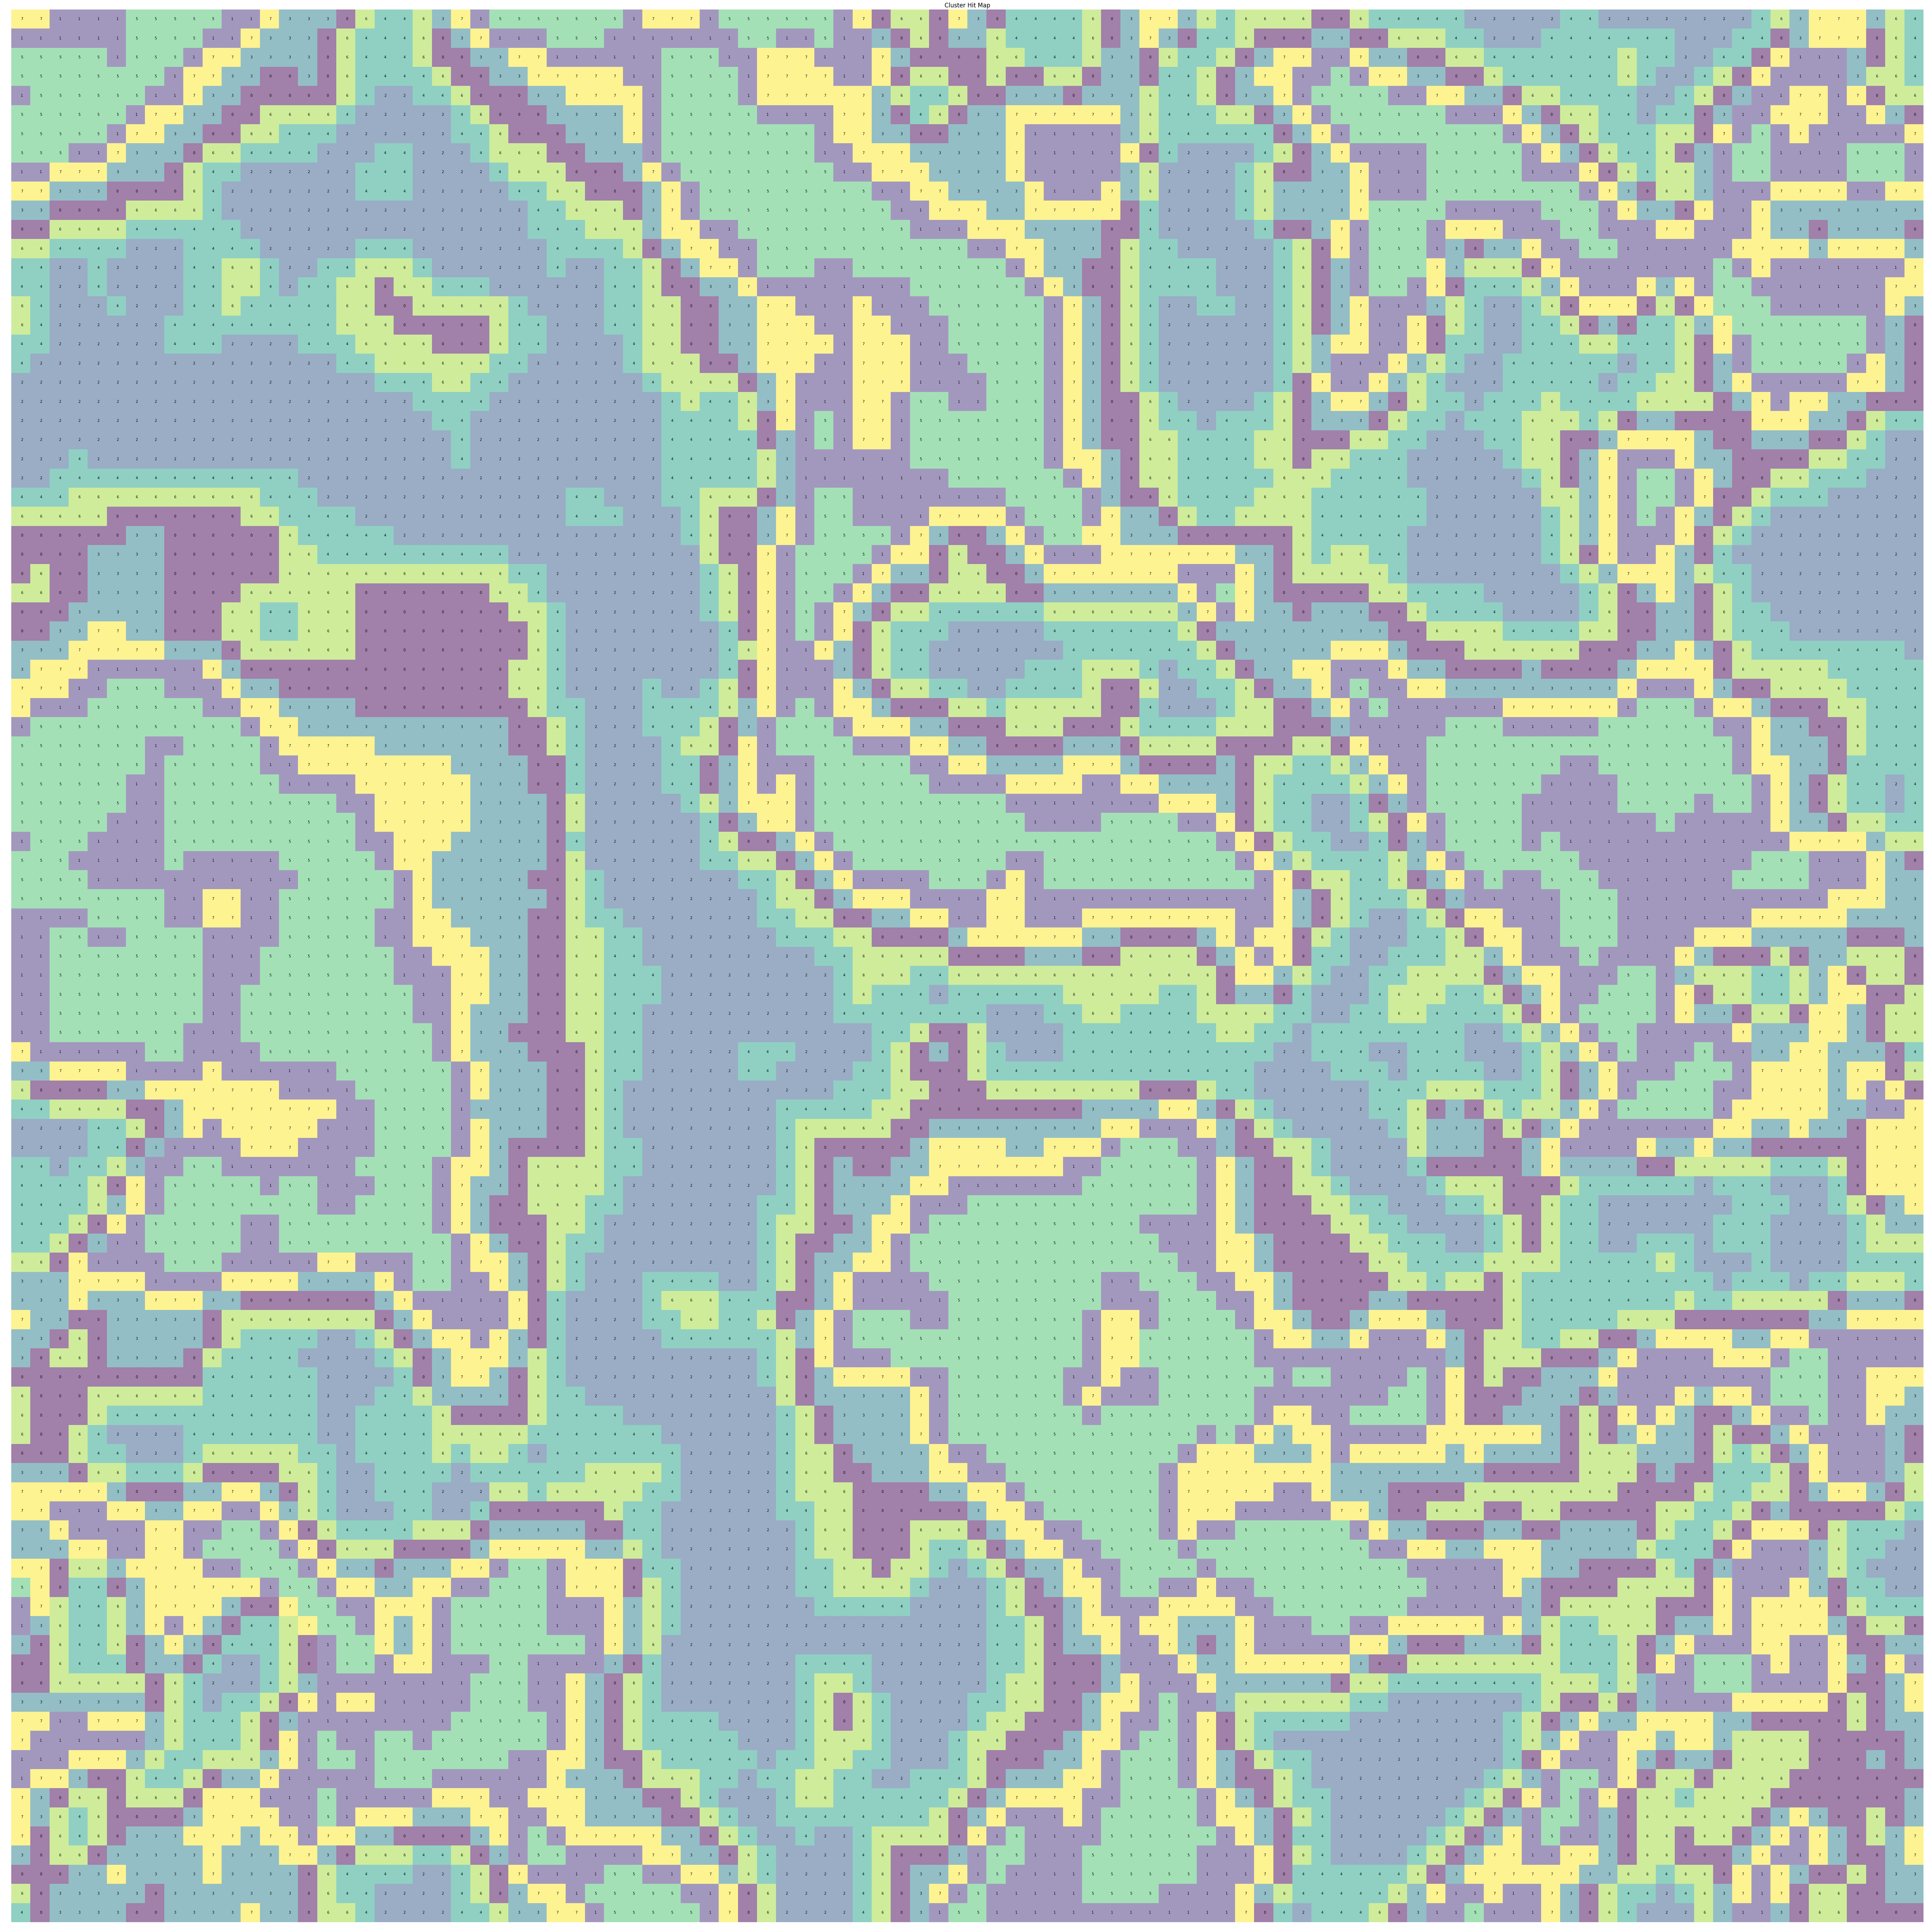

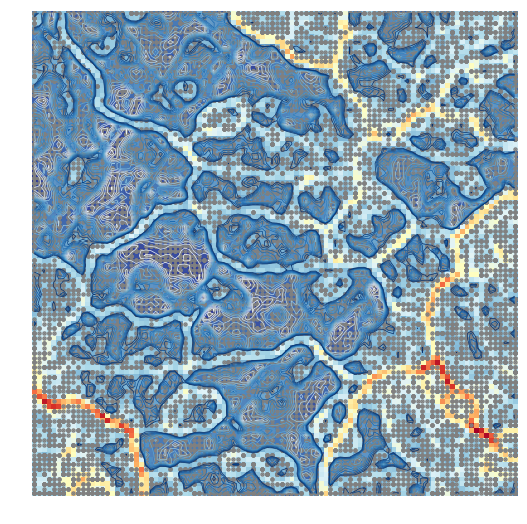

([], array([[0.34369033, 0.47860751, 0.44798236, ..., 0.78031047, 0.56150769,
         0.39188869],
        [0.48806893, 0.52587358, 0.41515823, ..., 0.75739224, 0.58057625,
         0.52164027],
        [0.64063331, 0.58060054, 0.38888927, ..., 0.68680256, 0.5855926 ,
         0.58269749],
        ...,
        [0.63884177, 0.7580328 , 0.7784066 , ..., 0.6265375 , 0.53663669,
         0.45360865],
        [0.63511241, 0.67882761, 0.68106058, ..., 0.53275319, 0.51650734,
         0.43713626],
        [0.59941605, 0.64731932, 0.6123145 , ..., 0.49228415, 0.47953928,
         0.35878371]]))

In [86]:
view2D  = View2D(100,100,"Data Map",text_size=14)
hitmap  = HitMapView(100,100,"Cluster Hit Map",text_size=14)
umat  = UMatrixView(100,100,"Unified Distance Matrix", text_size=14)

view2D.show(sm, col_sz=3, desnormalize=True)
hitmap.show(sm)
umat.show(sm)

In [103]:
del clus_train['kmeans']
del clus_train['index']